## Lead Scoring Case Study

### Problem Statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

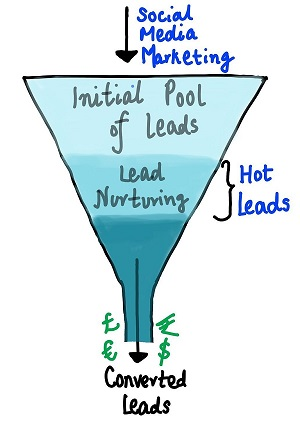

Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Objective:
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 1: Reading the dataset

In [177]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',300)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [178]:
# Read the dataset
lead_df = pd.read_csv('Leads.csv')

### Step 2: Inspecting the dataset

In [179]:
# Let's see the head of  dataset
lead_df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [180]:
# Let's check the dimensions of the dataframe
lead_df.shape

(9240, 37)

In [181]:
# let's look at the statistical aspects of the dataframe
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [182]:
### Checking the convertion Rate
curr_convertion_rate = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
curr_convertion_rate

38.53896103896104

### Insight
- Current convertion rate is ~39%

In [183]:
# Confirm whether Prospect ID is unique or not.
lead_df['Prospect ID'].is_unique

True

**Insight**
- All the Prospect ID having count of 9240 are unique.

In [184]:
#Let us convert longer columns names into shorter ones
column_names = {'Prospect ID':'ProspectID',
 'Lead Number':'LeadNumber',
 'Lead Origin':'LeadOrigin',
 'Lead Source':'LeadSource',
 'Do Not Email':'DoNotEmail',
 'Do Not Call':'DoNotCall',
 'Total Time Spent on Website':'TimeSpentOnWebsite',
 'Page Views Per Visit':'PageViewsPerVisit',
 'Last Activity':'LastActivity',
 'How did you hear about X Education':'HowDidYouHear?',
 'What is your current occupation':'Occupation',
 'What matters most to you in choosing a course':'Criteria',
 'Newspaper Article':'NewsArticle',
 'X Education Forums':'Edu.Forums',
 'Digital Advertisement':'Digi.Advertisement',
 'Through Recommendations':'Recommendations',
 'Receive More Updates About Our Courses':'ReceiveUpdates',
 'Lead Quality':'LeadQuality',
 'Update me on Supply Chain Content':'UpdateMe',
 'Get updates on DM Content':'UpdateOnDMContent',
 'Lead Profile':'LeadProfile',
 'Asymmetrique Activity Index':'ActivityIndex',
 'Asymmetrique Profile Index':'ProfileIndex',
 'Asymmetrique Activity Score':'ActivityScore',
 'Asymmetrique Profile Score':'ProfileScore',
 'I agree to pay the amount through cheque':'AgreeToPay',
 'A free copy of Mastering The Interview':'FreeIntCopy',
 'Last Notable Activity':'LastNotableActivity'
}

In [185]:
#Rename current columns into shorter form
lead_df.rename(columns = column_names, inplace = True) 

In [186]:
#Verify renamed collumn names
lead_df.head(5)

,ProspectID,LeadNumber,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,TotalVisits,TimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,HowDidYouHear?,Occupation,Criteria,Search,Magazine,NewsArticle,Edu.Forums,Newspaper,Digi.Advertisement,Recommendations,ReceiveUpdates,Tags,LeadQuality,UpdateMe,UpdateOnDMContent,LeadProfile,City,ActivityIndex,ProfileIndex,ActivityScore,ProfileScore,AgreeToPay,FreeIntCopy,LastNotableActivity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [187]:
#Are there any columns are missing after rename?
lead_df.shape

(9240, 37)

In [188]:
# Let's see the type of each column and their counts
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProspectID           9240 non-null   object 
 1   LeadNumber           9240 non-null   int64  
 2   LeadOrigin           9240 non-null   object 
 3   LeadSource           9204 non-null   object 
 4   DoNotEmail           9240 non-null   object 
 5   DoNotCall            9240 non-null   object 
 6   Converted            9240 non-null   int64  
 7   TotalVisits          9103 non-null   float64
 8   TimeSpentOnWebsite   9240 non-null   int64  
 9   PageViewsPerVisit    9103 non-null   float64
 10  LastActivity         9137 non-null   object 
 11  Country              6779 non-null   object 
 12  Specialization       7802 non-null   object 
 13  HowDidYouHear?       7033 non-null   object 
 14  Occupation           6550 non-null   object 
 15  Criteria             6531 non-null   o

### Step 3: Data Preparation

In [189]:
# Replace all 'Select' value with np.nan
lead_df['Specialization'] = lead_df['Specialization'].apply(lambda x: np.nan if x == 'Select' else x)
lead_df['HowDidYouHear?'] = lead_df['HowDidYouHear?'].apply(lambda x: np.nan if x == 'Select' else x)
lead_df['LeadProfile'] = lead_df['LeadProfile'].apply(lambda x: np.nan if x == 'Select' else x)
lead_df['City'] = lead_df['City'].apply(lambda x: np.nan if x == 'Select' else x)

In [190]:
#Check the head data
lead_df.head(5)

,ProspectID,LeadNumber,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,TotalVisits,TimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,HowDidYouHear?,Occupation,Criteria,Search,Magazine,NewsArticle,Edu.Forums,Newspaper,Digi.Advertisement,Recommendations,ReceiveUpdates,Tags,LeadQuality,UpdateMe,UpdateOnDMContent,LeadProfile,City,ActivityIndex,ProfileIndex,ActivityScore,ProfileScore,AgreeToPay,FreeIntCopy,LastNotableActivity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Missing values

In [191]:
# Function to calculate missing value percentages and sort them ascending
def calculate_missing_value_percentage():
    df = pd.DataFrame(lead_df.isnull().sum()/len(lead_df.index)*100, columns=['%'])
    df.sort_values(by=['%'],ascending=False,inplace=True)
    return df

In [192]:
#Calculate missing value percentage
calculate_missing_value_percentage()

,%
HowDidYouHear?,78.463203
LeadProfile,74.188312
LeadQuality,51.590909
ProfileScore,45.649351
ActivityScore,45.649351
ActivityIndex,45.649351
ProfileIndex,45.649351
City,39.707792
Specialization,36.580087
Tags,36.287879


#### Missing value treatment by dropping high percentage value fields % > 30

In [193]:
#From the above table, we can drop following columns whose missing value percentage is very high > 30
#HowDidYouHear?	78.463203
#LeadProfile	74.188312
#LeadQuality	51.590909
#ProfileScore	45.649351
#ActivityScore	45.649351
#ActivityIndex	45.649351
#ProfileIndex	45.649351
#City	39.707792
#Specialization	36.580087
#Tags	36.287879
#Criteria	29.318182

columns_to_drop = ['Tags','Criteria','HowDidYouHear?','LeadProfile','LeadQuality','ProfileScore','ActivityScore','ActivityIndex','ProfileIndex','City','Specialization']
lead_df.drop(columns=columns_to_drop,axis=1,inplace=True)

In [194]:
#Calculate missing value percentage
calculate_missing_value_percentage()

,%
Occupation,29.112554
Country,26.634199
TotalVisits,1.482684
PageViewsPerVisit,1.482684
LastActivity,1.114719
LeadSource,0.389610
ProspectID,0.000000
Edu.Forums,0.000000
FreeIntCopy,0.000000
AgreeToPay,0.000000


#### Drop features who does not help like 'LastNotableActivity' , 'LeadNumber' etc

In [195]:
# Drop column 'LastNotableActivity', 'LeadNumber' whcih generated by sales team
lead_df.drop(columns=['LastNotableActivity','LeadNumber'],axis=1,inplace=True)

In [196]:
#Categorical feature missing value treatment by replacing with Mode value
lead_df.Occupation = lead_df.Occupation.apply(lambda x: lead_df.Occupation.mode()[0] if type(x) == float else x)
lead_df.Country = lead_df.Country.apply(lambda x: lead_df.Country.mode()[0] if type(x) == float else x)
lead_df.LeadSource = lead_df.LeadSource.apply(lambda x: lead_df.LeadSource.mode()[0] if type(x) == float else x)
lead_df.LastActivity = lead_df.LastActivity.apply(lambda x: lead_df.LastActivity.mode()[0] if type(x) == float else x)

In [197]:
#Check again missing value percentage after droping columns
calculate_missing_value_percentage()

,%
TotalVisits,1.482684
PageViewsPerVisit,1.482684
ProspectID,0.000000
Magazine,0.000000
AgreeToPay,0.000000
UpdateOnDMContent,0.000000
UpdateMe,0.000000
ReceiveUpdates,0.000000
Recommendations,0.000000
Digi.Advertisement,0.000000


#### Drop all rows whose missing value percentage is very small

In [198]:
#Drop rows whose missing value percentage is 1
lead_df.dropna(axis=0,how='any',inplace=True)

In [199]:
#Check again missing value percentage after droping columns
calculate_missing_value_percentage()

,%
ProspectID,0.0
LeadOrigin,0.0
AgreeToPay,0.0
UpdateOnDMContent,0.0
UpdateMe,0.0
ReceiveUpdates,0.0
Recommendations,0.0
Digi.Advertisement,0.0
Newspaper,0.0
Edu.Forums,0.0


In [200]:
#Check dataframe
lead_df.shape

(9103, 24)

#### Insight
- Now we don't have any missing values. Also, we have 9103 records and 24 features

#### Converting some binary variables (Yes/No) to 0/1

In [201]:
#Converting binary variables (Yes/No) to 0/1
varlist =  ['DoNotEmail', 'DoNotCall', 'Search', 'Magazine', 'NewsArticle','Edu.Forums','Newspaper','Digi.Advertisement',
            'Recommendations','ReceiveUpdates','UpdateMe','UpdateOnDMContent','AgreeToPay','FreeIntCopy']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [202]:
#Check dataframe
lead_df.head(5)

,ProspectID,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,TotalVisits,TimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,Occupation,Search,Magazine,NewsArticle,Edu.Forums,Newspaper,Digi.Advertisement,Recommendations,ReceiveUpdates,UpdateMe,UpdateOnDMContent,AgreeToPay,FreeIntCopy
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,0,0,0,0,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [203]:
category_var_list = ['LeadOrigin', 'LeadSource', 'LastActivity','Occupation','Country']

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_vars = pd.get_dummies(lead_df[category_var_list], drop_first=True)

# Adding the results to the master dataframe
lead_df = pd.concat([lead_df, dummy_vars], axis=1)

In [204]:
# We have created dummies for the above variables, so we can drop them
lead_df = lead_df.drop(category_var_list, axis=1)

In [205]:
#Check data
lead_df.head(5)

,ProspectID,DoNotEmail,DoNotCall,Converted,TotalVisits,TimeSpentOnWebsite,PageViewsPerVisit,Search,Magazine,NewsArticle,Edu.Forums,Newspaper,Digi.Advertisement,Recommendations,ReceiveUpdates,UpdateMe,UpdateOnDMContent,AgreeToPay,FreeIntCopy,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_NC_EDM,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_google,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_Resubscribed to emails,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Checking for Outliers

In [206]:
#function to draw box plot for given columns
def draw_box_plot(features,df=lead_df):
    plt.figure(figsize=(15,8))
    for i in range(1,4):
        plt.subplot(1,3,i)
        sns.boxplot(x=features[i-1],orient="v",data=df)
        
    plt.show()

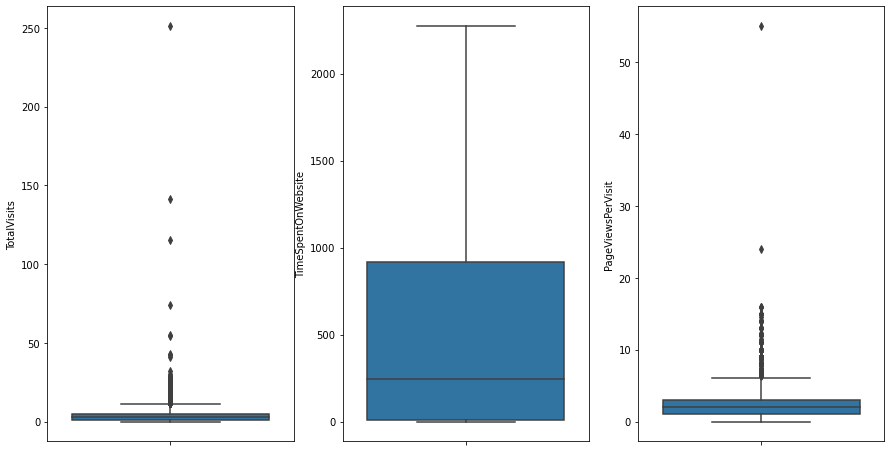

In [207]:
# Check outliers for ['TotalVisits','TimeSpentOnWebsite','PageViewsPerVisit']
draw_box_plot(['TotalVisits','TimeSpentOnWebsite','PageViewsPerVisit'])

#### Insight
- We have two features with 'TotalVisits' and 'PageViewsPerVisit' with outliers

#### Outliers treatment by capping

In [208]:
# We can put upper cap for TotalVisits  and PageViewsPerVisit 
q4 = lead_df.TotalVisits.quantile(0.95)
lead_df['TotalVisits'][lead_df['TotalVisits']>= q4] = q4

q4 = lead_df.PageViewsPerVisit.quantile(0.95)
lead_df['PageViewsPerVisit'][lead_df['PageViewsPerVisit']>= q4] = q4

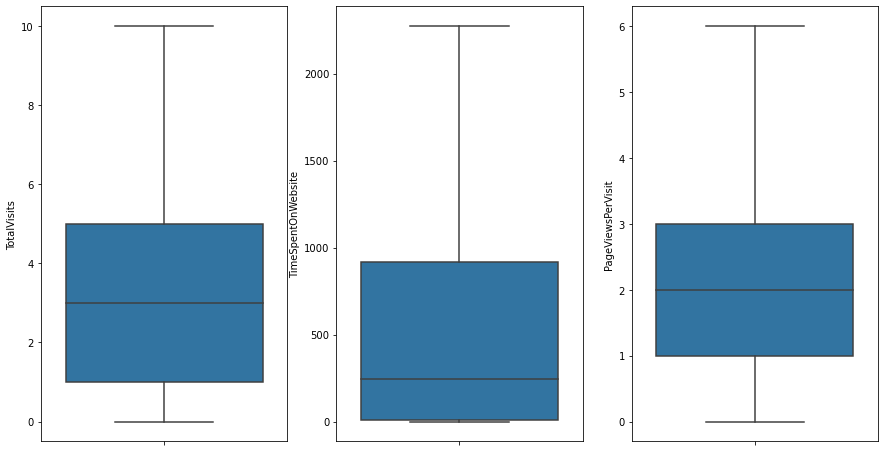

In [209]:
# Check again for outliers
numeric_fields = ['TotalVisits','TimeSpentOnWebsite','PageViewsPerVisit']
draw_box_plot(numeric_fields)

#### Insight
- We have capped features 'TotalVisits' and 'PageViewsPerVisit' at 0.95 quantile

### Step 4: Test-Train Split

In [210]:
#Check the records
lead_df.head(5)

,ProspectID,DoNotEmail,DoNotCall,Converted,TotalVisits,TimeSpentOnWebsite,PageViewsPerVisit,Search,Magazine,NewsArticle,Edu.Forums,Newspaper,Digi.Advertisement,Recommendations,ReceiveUpdates,UpdateMe,UpdateOnDMContent,AgreeToPay,FreeIntCopy,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_NC_EDM,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_google,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_Resubscribed to emails,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [211]:
# Putting feature variable to X
X = lead_df.drop(['ProspectID','Converted'], axis=1)
X.head()

,DoNotEmail,DoNotCall,TotalVisits,TimeSpentOnWebsite,PageViewsPerVisit,Search,Magazine,NewsArticle,Edu.Forums,Newspaper,Digi.Advertisement,Recommendations,ReceiveUpdates,UpdateMe,UpdateOnDMContent,AgreeToPay,FreeIntCopy,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_NC_EDM,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_google,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_Resubscribed to emails,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [212]:
# Putting response variable to y
y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [213]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [214]:
#Apply scaling on fields 'TotalVisits','TimeSpentOnWebsite','PageViewsPerVisit'
scaler = StandardScaler()
X_train[numeric_fields] = scaler.fit_transform(X_train[numeric_fields])
X_train.head()

,DoNotEmail,DoNotCall,TotalVisits,TimeSpentOnWebsite,PageViewsPerVisit,Search,Magazine,NewsArticle,Edu.Forums,Newspaper,Digi.Advertisement,Recommendations,ReceiveUpdates,UpdateMe,UpdateOnDMContent,AgreeToPay,FreeIntCopy,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_NC_EDM,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_google,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_Resubscribed to emails,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown
7962,0,0,-0.068258,1.476324,-0.423364,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5520,0,0,1.362470,-0.771066,2.083179,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1962,0,0,0.647106,-0.571257,0.133646,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1566,0,0,2.435517,1.393834,0.690655,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9170,0,0,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Step 6: Model Building

In [215]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           88
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 25 Oct 2020   Deviance:                          nan
Time:                        21:22:29   Pearson chi2:                 7.84e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                      3.662e+15   7.29e+07   5.02e+07      0.000    3.66e+15    3.66e+15
DoNotEmail                                 4.158e+13    4.4e+06   9.46e+06      0.000    4.16e+13    4.16e+13
DoNotCall                                  1.223e+15   4.75e+07   2.57e+07      0.000    1.22e+15    1.22e+15
TotalVisits                               -3.674e+13   1.41e+06   -2.6e+07      0.000   -3.67e+13   -3.67e+13
TimeSpentOnWebsite                         6.509e+14   9.72e+05    6.7e+08      0.000    6.51e+14    6.51e+14
PageViewsPerVisit                         -6.072e+13   1.55e+06  -3.91e+07      0.000   -6.07e+13   -6.07e+13
Search                                     6.063e+14   2.22e+07   2.72e+07      0.000    6.06e+14    6.06e+14
Magazine                                    105.8658   3.93e-06    2.7e+07      0.000     105.866     105.866
NewsArticle                               -1.552e+15   4.22e+07  -3.68e+07      0.000   -1.55e+15   -1.55e+15
Edu.Forums                                -1.552e+15   4.22e+07  -3.68e+07      0.000   -1.55e+15   -1.55e+15
Newspaper                                 -5.785e+15   6.73e+07   -8.6e+07      0.000   -5.79e+15   -5.79e+15
Digi.Advertisement                        -2.064e+15   3.89e+07  -5.31e+07      0.000   -2.06e+15   -2.06e+15
Recommendations                           -2.074e+14   3.14e+07   -6.6e+06      0.000   -2.07e+14   -2.07e+14
ReceiveUpdates                              216.0263   7.94e-06   2.72e+07      0.000     216.026     216.026
UpdateMe                                     20.6641   1.94e-06   1.07e+07      0.000      20.664      20.664
UpdateOnDMContent                            20.9193   6.64e-07   3.15e+07      0.000      20.919      20.919
AgreeToPay                                  -56.2097   1.78e-06  -3.16e+07      0.000     -56.210     -56.210
FreeIntCopy                                7.367e+13   2.62e+06   2.81e+07      0.000    7.37e+13    7.37e+13
LeadOrigin_Landing Page Submission         8.318e+13   2.71e+06   3.07e+07      0.000    8.32e+13    8.32e+13
LeadOrigin_Lead Add Form                   1.882e+15   1.61e+07   1.17e+08      0.000    1.88e+15    1.88e+15
LeadOrigin_Lead Import                    -1.151e+15    4.9e+07  -2.35e+07      0.000   -1.15e+15   -1.15e+15
LeadSource_Direct Traffic                 -5.453e+14   3.73e+07  -1.46e+07      0.000   -5.45e+14   -5.45e+14
LeadSource_Facebook                       -7.134e+14   6.15e+07  -1.16e+07      0.000   -7.13e+14   -7.13e+14
LeadSource_Google                         -4.632e+14   3.72e+07  -1.25e+07      0.000   -4.63e+14   -4.63e+14
LeadSource_Live Chat                       3.622e+15   5.82e+07   6.23e+07      0.000    3.62e+15    3.62e+15
Lea

### Step 7: Feature Selection Using RFE

In [216]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)       # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [217]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [218]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('DoNotEmail', True, 1),
 ('DoNotCall', False, 8),
 ('TotalVisits', False, 24),
 ('TimeSpentOnWebsite', True, 1),
 ('PageViewsPerVisit', False, 25),
 ('Search', False, 41),
 ('Magazine', False, 72),
 ('NewsArticle', False, 37),
 ('Edu.Forums', False, 31),
 ('Newspaper', True, 1),
 ('Digi.Advertisement', False, 23),
 ('Recommendations', False, 39),
 ('ReceiveUpdates', False, 79),
 ('UpdateMe', False, 73),
 ('UpdateOnDMContent', False, 76),
 ('AgreeToPay', False, 78),
 ('FreeIntCopy', False, 70),
 ('LeadOrigin_Landing Page Submission', False, 42),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', True, 1),
 ('LeadSource_Direct Traffic', False, 29),
 ('LeadSource_Facebook', False, 44),
 ('LeadSource_Google', False, 34),
 ('LeadSource_Live Chat', False, 48),
 ('LeadSource_NC_EDM', False, 12),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 33),
 ('LeadSource_Pay per Click Ads', False, 51),
 ('LeadSource_Press_Release', False, 74),
 ('LeadSource

In [219]:
#Top 20 selected features
col = X_train.columns[rfe.support_]
col

Index(['DoNotEmail', 'TimeSpentOnWebsite', 'Newspaper',
       'LeadOrigin_Lead Add Form', 'LeadOrigin_Lead Import',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LeadSource_google', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'LastActivity_Unsubscribed', 'Occupation_Housewife',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Country_Italy', 'Country_Nigeria', 'Country_Qatar'],
      dtype='object')

##### Assessing the model with StatsModels

In [220]:
#Function to calculate VIF for the given features
def calculate_vif(col):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [221]:
#Build model
def build_model(features):
    #Create model
    train_sm = sm.add_constant(X_train[features])
    logm = sm.GLM(y_train,train_sm, family = sm.families.Binomial())
    res = logm.fit()
    
    # Getting the predicted values on the train set
    y_train_pred = res.predict(train_sm).values.reshape(-1)
    
    #Creating a dataframe with the actual converted flag and the predicted probabilities
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
    y_train_pred_final['ProspectID_Idx'] = y_train.index
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
    
    #Create confusion matrix 
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
    
    #Calculate overall accuracy.
    acc_score = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
    
    return train_sm,res,logm,y_train_pred_final,confusion,acc_score   

In [222]:
# function to build model by dropping specified feature
def drop_feature_and_build_model(feature_to_drop):
    rem_col = col.drop(feature_to_drop, 1)
    
    #Build model for the specified columns
    train_sm,result,logm,y_train_pred,c_matrix,a_score = build_model(rem_col)
    
    return train_sm,result,logm,y_train_pred,c_matrix,a_score,rem_col

In [223]:
#function to model metrics
def calculate_metrics(c_matrix):
    TP = c_matrix[1,1] # true positive 
    TN = c_matrix[0,0] # true negatives
    FP = c_matrix[0,1] # false positives
    FN = c_matrix[1,0] # false negatives
    
    #Sensitivity
    sensitivity = (TP / float(TP+FN))
    print("Sensitivity %=",round(sensitivity*100,2))
    
    #Specificity
    specificity = (TN / float(TN+FP))
    print("Specificity %=",round(specificity*100,2))
    
    # Calculate FPR (false postive rate)
    FPR = (FP/ float(TN+FP))
    print("False Positive Rate %=",round(FPR*100,2))
    
    # PPR (positive predictive value)
    PPR = (TP / float(TP+FP))
    print("Positive Predictive Rate %=",round(PPR*100,2))
    
    # NPR (Negative predictive value)
    NPR = (TN / float(TN+ FN))
    print("Negative Predictive Rate %=",round(NPR*100,2))

In [224]:
#Print Accuracy score
def print_accuracy_score(acc_score):
    #Print Accuracy score
    accuracy = round(acc_score*100,2)
    print('Accuracy Score %=',accuracy)

In [225]:
#Build model for the specified features
X_train_sm,res,logm2,y_train_pred_final,confusion,acc_score = build_model(col)

#Print summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2700.6
Date:                Sun, 25 Oct 2020   Deviance:                       5401.1
Time:                        21:22:57   Pearson chi2:                 6.72e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8506      0.216     -3.932      0.000      -1.275      -0.427
DoNotEmail                               -1.4379      0.201     -7.143      0.000      -1.833      -1.043
TimeSpentOnWebsite                        1.1198      0.040     28.274      0.000       1.042       1.197
Newspaper                               -24.9174   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
LeadOrigin_Lead Add Form                  3.9298      0.222     17.672      0.000       3.494       4.366
LeadOrigin_Lead Import                    1.2350      0.451      2.736      0.006       0.350       2.120
LeadSource_Olark Chat                     1.1509      0.102     11.240      0.000       0.950       1.352
LeadSource_Welingak Website               1.9144      0.757      2.529      0.011       0.431       3.398
LeadSource_google                       -22.8390   4.23e+04     -0.001      1.000    -8.3e+04    8.29e+04
LastActivity_Converted to Lead           -1.3135      0.210     -6.242      0.000      -1.726      -0.901
LastActivity_Email Bounced               -0.6994      0.365     -1.915      0.055      -1.415       0.016
LastActivity_Had a Phone Conversation     1.8131      0.618      2.934      0.003       0.602       3.024
LastActivity_Olark Chat Conversation     -1.4594      0.160     -9.101      0.000      -1.774      -1.145
LastActivity_SMS Sent                     1.2493      0.075     16.664      0.000       1.102       1.396
LastActivity_Unsubscribed                 0.9947      0.480      2.071      0.038       0.054       1.936
Occupation_Housewife                     23.7240   2.64e+04      0.001      0.999   -5.18e+04    5.18e+04
Occupation_Unemployed                    -0.5310      0.217     -2.447      0.014      -0.956      -0.106
Occupation_Working Professional           2.3272      0.282      8.266      0.000       1.775       2.879
Country_Italy                           -24.7628   4.48e+04     -0.001      1.000   -8.78e+04    8.78e+04
Country_Nigeria                         -23.6892    5.3e+04     -0.000      1.000   -1.04e+05    1.04e+05
Country_Qatar                           -22.3241   2.76e+04     -0.001      0.999   -5.42e+04    5.42e+04
=========================================================================================================
"""

In [226]:
#Print Accuracy score
print_accuracy_score(acc_score)

Accuracy Score %= 81.28


#### Check for VIFs

In [227]:
# Check for VIF's
vif = calculate_vif(col)
vif

,Features,VIF
15,Occupation_Unemployed,2.21
0,DoNotEmail,2.05
9,LastActivity_Email Bounced,1.86
5,LeadSource_Olark Chat,1.77
12,LastActivity_SMS Sent,1.66
3,LeadOrigin_Lead Add Form,1.56
11,LastActivity_Olark Chat Conversation,1.44
6,LeadSource_Welingak Website,1.32
1,TimeSpentOnWebsite,1.30
16,Occupation_Working Professional,1.22


### Insights
- From the above result, we can see that we have features with high p-value.Let us drop them one by one.

1. High p-value features are,
    - Country_Nigeria
    - Country_Qatar
    - Country_Italy
    - Newspaper
    - LeadSource_google
    - Occupation_Housewife
    - LastActivity_Email Bounced

#### Start dropping features with high p-value and VIF iteratively

In [228]:
# Drop high p-value feature 'Country_Nigeria' and Rebuild Model
X_train_sm,res,logm3,y_train_pred_final,confusion,acc_score,col = drop_feature_and_build_model('Country_Nigeria')

#Print summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.1
Date:                Sun, 25 Oct 2020   Deviance:                       5404.1
Time:                        21:25:19   Pearson chi2:                 6.72e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8507      0.216     -3.933      0.000      -1.275      -0.427
DoNotEmail                               -1.4360      0.201     -7.134      0.000      -1.831      -1.041
TimeSpentOnWebsite                        1.1193      0.040     28.267      0.000       1.042       1.197
Newspaper                               -24.9152   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
LeadOrigin_Lead Add Form                  3.9305      0.222     17.675      0.000       3.495       4.366
LeadOrigin_Lead Import                    1.2357      0.451      2.738      0.006       0.351       2.120
LeadSource_Olark Chat                     1.1516      0.102     11.248      0.000       0.951       1.352
LeadSource_Welingak Website               1.9143      0.757      2.529      0.011       0.431       3.398
LeadSource_google                       -22.8377   4.23e+04     -0.001      1.000    -8.3e+04    8.29e+04
LastActivity_Converted to Lead           -1.3124      0.210     -6.237      0.000      -1.725      -0.900
LastActivity_Email Bounced               -0.7003      0.365     -1.918      0.055      -1.416       0.015
LastActivity_Had a Phone Conversation     1.8139      0.618      2.935      0.003       0.603       3.025
LastActivity_Olark Chat Conversation     -1.4593      0.160     -9.100      0.000      -1.774      -1.145
LastActivity_SMS Sent                     1.2476      0.075     16.650      0.000       1.101       1.394
LastActivity_Unsubscribed                 0.9938      0.480      2.070      0.038       0.053       1.935
Occupation_Housewife                     23.7240   2.64e+04      0.001      0.999   -5.18e+04    5.18e+04
Occupation_Unemployed                    -0.5318      0.217     -2.451      0.014      -0.957      -0.106
Occupation_Working Professional           2.3273      0.281      8.268      0.000       1.776       2.879
Country_Italy                           -24.7594   4.48e+04     -0.001      1.000   -8.78e+04    8.78e+04
Country_Qatar                           -22.3225   2.76e+04     -0.001      0.999   -5.42e+04    5.42e+04
=========================================================================================================
"""

In [229]:
#Print Accuracy score
print_accuracy_score(acc_score)

Accuracy Score %= 81.26


In [230]:
# Check again for VIF's
vif = calculate_vif(col)
vif

,Features,VIF
15,Occupation_Unemployed,2.21
0,DoNotEmail,2.05
9,LastActivity_Email Bounced,1.86
5,LeadSource_Olark Chat,1.77
12,LastActivity_SMS Sent,1.66
3,LeadOrigin_Lead Add Form,1.56
11,LastActivity_Olark Chat Conversation,1.44
6,LeadSource_Welingak Website,1.32
1,TimeSpentOnWebsite,1.30
16,Occupation_Working Professional,1.22


In [231]:
# Drop high p-value feature 'Country_Qatar' and Rebuild Model
X_train_sm,res,logm4,y_train_pred_final,confusion,acc_score,col = drop_feature_and_build_model('Country_Qatar')

#Print summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.8
Date:                Sun, 25 Oct 2020   Deviance:                       5407.7
Time:                        21:25:48   Pearson chi2:                 6.73e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8517      0.216     -3.937      0.000      -1.276      -0.428
DoNotEmail                               -1.4372      0.201     -7.144      0.000      -1.832      -1.043
TimeSpentOnWebsite                        1.1202      0.040     28.293      0.000       1.043       1.198
Newspaper                               -23.9149   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
LeadOrigin_Lead Add Form                  3.9338      0.222     17.691      0.000       3.498       4.370
LeadOrigin_Lead Import                    1.2390      0.451      2.745      0.006       0.354       2.124
LeadSource_Olark Chat                     1.1548      0.102     11.279      0.000       0.954       1.355
LeadSource_Welingak Website               1.9145      0.757      2.530      0.011       0.431       3.398
LeadSource_google                       -21.8358   2.57e+04     -0.001      0.999   -5.03e+04    5.03e+04
LastActivity_Converted to Lead           -1.3108      0.210     -6.228      0.000      -1.723      -0.898
LastActivity_Email Bounced               -0.6980      0.365     -1.912      0.056      -1.414       0.018
LastActivity_Had a Phone Conversation     1.8163      0.618      2.939      0.003       0.605       3.028
LastActivity_Olark Chat Conversation     -1.4588      0.160     -9.096      0.000      -1.773      -1.144
LastActivity_SMS Sent                     1.2474      0.075     16.652      0.000       1.101       1.394
LastActivity_Unsubscribed                 0.9966      0.480      2.075      0.038       0.055       1.938
Occupation_Housewife                     22.7248    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
Occupation_Unemployed                    -0.5333      0.217     -2.458      0.014      -0.959      -0.108
Occupation_Working Professional           2.3277      0.282      8.269      0.000       1.776       2.879
Country_Italy                           -23.7579   2.72e+04     -0.001      0.999   -5.33e+04    5.32e+04
=========================================================================================================
"""

In [232]:
#Print Accuracy score
print_accuracy_score(acc_score)

Accuracy Score %= 81.25


In [233]:
# Check again for VIF's
vif = calculate_vif(col)
vif

,Features,VIF
15,Occupation_Unemployed,2.20
0,DoNotEmail,2.05
9,LastActivity_Email Bounced,1.86
5,LeadSource_Olark Chat,1.77
12,LastActivity_SMS Sent,1.66
3,LeadOrigin_Lead Add Form,1.56
11,LastActivity_Olark Chat Conversation,1.44
6,LeadSource_Welingak Website,1.32
1,TimeSpentOnWebsite,1.30
16,Occupation_Working Professional,1.22


In [234]:
# Drop high p-value feature 'Country_Italy' and Rebuild Model
X_train_sm,res,logm5,y_train_pred_final,confusion,acc_score,col = drop_feature_and_build_model('Country_Italy')

#Print summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2706.5
Date:                Sun, 25 Oct 2020   Deviance:                       5413.1
Time:                        21:26:05   Pearson chi2:                 6.73e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8507      0.216     -3.935      0.000      -1.274      -0.427
DoNotEmail                               -1.4338      0.201     -7.130      0.000      -1.828      -1.040
TimeSpentOnWebsite                        1.1179      0.040     28.273      0.000       1.040       1.195
Newspaper                               -23.9101   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
LeadOrigin_Lead Add Form                  3.9323      0.222     17.687      0.000       3.497       4.368
LeadOrigin_Lead Import                    1.2375      0.451      2.742      0.006       0.353       2.122
LeadSource_Olark Chat                     1.1536      0.102     11.273      0.000       0.953       1.354
LeadSource_Welingak Website               1.9146      0.757      2.530      0.011       0.431       3.398
LeadSource_google                       -21.8346   2.57e+04     -0.001      0.999   -5.03e+04    5.03e+04
LastActivity_Converted to Lead           -1.3098      0.210     -6.225      0.000      -1.722      -0.897
LastActivity_Email Bounced               -0.7004      0.365     -1.919      0.055      -1.416       0.015
LastActivity_Had a Phone Conversation     1.8159      0.618      2.939      0.003       0.605       3.027
LastActivity_Olark Chat Conversation     -1.4591      0.160     -9.101      0.000      -1.773      -1.145
LastActivity_SMS Sent                     1.2430      0.075     16.608      0.000       1.096       1.390
LastActivity_Unsubscribed                 0.9937      0.480      2.070      0.038       0.053       1.935
Occupation_Housewife                     22.7237    1.6e+04      0.001      0.999   -3.14e+04    3.15e+04
Occupation_Unemployed                    -0.5337      0.217     -2.461      0.014      -0.959      -0.109
Occupation_Working Professional           2.3276      0.281      8.272      0.000       1.776       2.879
=========================================================================================================
"""

In [235]:
#Print Accuracy score
print_accuracy_score(acc_score)

Accuracy Score %= 81.26


In [236]:
# Check again for VIF's
vif = calculate_vif(col)
vif

,Features,VIF
15,Occupation_Unemployed,2.20
0,DoNotEmail,2.05
9,LastActivity_Email Bounced,1.86
5,LeadSource_Olark Chat,1.77
12,LastActivity_SMS Sent,1.66
3,LeadOrigin_Lead Add Form,1.56
11,LastActivity_Olark Chat Conversation,1.44
6,LeadSource_Welingak Website,1.32
1,TimeSpentOnWebsite,1.30
16,Occupation_Working Professional,1.22


In [237]:
# Drop high p-value feature 'Newspaper' and Rebuild Model
X_train_sm,res,logm6,y_train_pred_final,confusion,acc_score,col = drop_feature_and_build_model('Newspaper')

#Print summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.1
Date:                Sun, 25 Oct 2020   Deviance:                       5416.2
Time:                        21:26:25   Pearson chi2:                 6.72e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8505      0.216     -3.935      0.000      -1.274      -0.427
DoNotEmail                               -1.4330      0.201     -7.128      0.000      -1.827      -1.039
TimeSpentOnWebsite                        1.1155      0.039     28.246      0.000       1.038       1.193
LeadOrigin_Lead Add Form                  3.9306      0.222     17.680      0.000       3.495       4.366
LeadOrigin_Lead Import                    1.2359      0.451      2.739      0.006       0.351       2.120
LeadSource_Olark Chat                     1.1519      0.102     11.259      0.000       0.951       1.352
LeadSource_Welingak Website               1.9141      0.757      2.529      0.011       0.431       3.397
LeadSource_google                       -21.8320   2.57e+04     -0.001      0.999   -5.03e+04    5.03e+04
LastActivity_Converted to Lead           -1.3071      0.210     -6.215      0.000      -1.719      -0.895
LastActivity_Email Bounced               -0.6988      0.365     -1.915      0.056      -1.414       0.017
LastActivity_Had a Phone Conversation     1.8172      0.618      2.942      0.003       0.607       3.028
LastActivity_Olark Chat Conversation     -1.4577      0.160     -9.093      0.000      -1.772      -1.143
LastActivity_SMS Sent                     1.2443      0.075     16.630      0.000       1.098       1.391
LastActivity_Unsubscribed                 0.9948      0.480      2.073      0.038       0.054       1.935
Occupation_Housewife                     22.7235    1.6e+04      0.001      0.999   -3.14e+04    3.15e+04
Occupation_Unemployed                    -0.5347      0.217     -2.466      0.014      -0.960      -0.110
Occupation_Working Professional           2.3268      0.281      8.272      0.000       1.775       2.878
=========================================================================================================
"""

In [238]:
#Print Accuracy score
print_accuracy_score(acc_score)

Accuracy Score %= 81.2


In [239]:
# Check again for VIF's
vif = calculate_vif(col)
vif

,Features,VIF
14,Occupation_Unemployed,2.20
0,DoNotEmail,2.05
8,LastActivity_Email Bounced,1.86
4,LeadSource_Olark Chat,1.77
11,LastActivity_SMS Sent,1.66
2,LeadOrigin_Lead Add Form,1.56
10,LastActivity_Olark Chat Conversation,1.44
5,LeadSource_Welingak Website,1.32
1,TimeSpentOnWebsite,1.30
15,Occupation_Working Professional,1.22


In [240]:
# Drop high p-value feature 'LeadSource_google' and Rebuild Model
X_train_sm,res,logm7,y_train_pred_final,confusion,acc_score,col = drop_feature_and_build_model('LeadSource_google')

#Print summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.4
Date:                Sun, 25 Oct 2020   Deviance:                       5418.8
Time:                        21:26:35   Pearson chi2:                 6.73e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8513      0.216     -3.939      0.000      -1.275      -0.428
DoNotEmail                               -1.4324      0.201     -7.124      0.000      -1.827      -1.038
TimeSpentOnWebsite                        1.1150      0.039     28.241      0.000       1.038       1.192
LeadOrigin_Lead Add Form                  3.9316      0.222     17.684      0.000       3.496       4.367
LeadOrigin_Lead Import                    1.2371      0.451      2.741      0.006       0.353       2.122
LeadSource_Olark Chat                     1.1528      0.102     11.267      0.000       0.952       1.353
LeadSource_Welingak Website               1.9136      0.757      2.529      0.011       0.430       3.397
LastActivity_Converted to Lead           -1.3046      0.210     -6.203      0.000      -1.717      -0.892
LastActivity_Email Bounced               -0.6971      0.365     -1.910      0.056      -1.412       0.018
LastActivity_Had a Phone Conversation     1.8196      0.618      2.946      0.003       0.609       3.030
LastActivity_Olark Chat Conversation     -1.4562      0.160     -9.085      0.000      -1.770      -1.142
LastActivity_SMS Sent                     1.2464      0.075     16.660      0.000       1.100       1.393
LastActivity_Unsubscribed                 0.9965      0.480      2.077      0.038       0.056       1.937
Occupation_Housewife                     22.7242    1.6e+04      0.001      0.999   -3.14e+04    3.15e+04
Occupation_Unemployed                    -0.5362      0.217     -2.473      0.013      -0.961      -0.111
Occupation_Working Professional           2.3265      0.281      8.271      0.000       1.775       2.878
=========================================================================================================
"""

In [241]:
#Print Accuracy score
print_accuracy_score(acc_score)

Accuracy Score %= 81.2


In [242]:
# Check again for VIF's
vif = calculate_vif(col)
vif

,Features,VIF
13,Occupation_Unemployed,2.20
0,DoNotEmail,2.05
7,LastActivity_Email Bounced,1.86
4,LeadSource_Olark Chat,1.77
10,LastActivity_SMS Sent,1.66
2,LeadOrigin_Lead Add Form,1.56
9,LastActivity_Olark Chat Conversation,1.44
5,LeadSource_Welingak Website,1.32
1,TimeSpentOnWebsite,1.30
14,Occupation_Working Professional,1.22


In [243]:
# Drop high p-value feature 'Occupation_Housewife' and Rebuild Model
X_train_sm,res,logm8,y_train_pred_final,confusion,acc_score,col = drop_feature_and_build_model('Occupation_Housewife')

#Print summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.2
Date:                Sun, 25 Oct 2020   Deviance:                       5428.4
Time:                        21:26:52   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7168      0.208     -3.448      0.001      -1.124      -0.309
DoNotEmail                               -1.4362      0.201     -7.142      0.000      -1.830      -1.042
TimeSpentOnWebsite                        1.1147      0.039     28.258      0.000       1.037       1.192
LeadOrigin_Lead Add Form                  3.9293      0.222     17.679      0.000       3.494       4.365
LeadOrigin_Lead Import                    1.2347      0.451      2.736      0.006       0.350       2.119
LeadSource_Olark Chat                     1.1474      0.102     11.223      0.000       0.947       1.348
LeadSource_Welingak Website               1.9154      0.757      2.531      0.011       0.432       3.399
LastActivity_Converted to Lead           -1.3098      0.210     -6.231      0.000      -1.722      -0.898
LastActivity_Email Bounced               -0.7003      0.365     -1.919      0.055      -1.415       0.015
LastActivity_Had a Phone Conversation     1.8169      0.618      2.942      0.003       0.606       3.027
LastActivity_Olark Chat Conversation     -1.4623      0.160     -9.121      0.000      -1.777      -1.148
LastActivity_SMS Sent                     1.2433      0.075     16.620      0.000       1.097       1.390
LastActivity_Unsubscribed                 0.9980      0.480      2.080      0.038       0.058       1.938
Occupation_Unemployed                    -0.6677      0.209     -3.196      0.001      -1.077      -0.258
Occupation_Working Professional           2.1948      0.275      7.975      0.000       1.655       2.734
=========================================================================================================
"""

In [244]:
#Print Accuracy score
print_accuracy_score(acc_score)

Accuracy Score %= 81.17


In [245]:
# Check again for VIF's
vif = calculate_vif(col)
vif

,Features,VIF
12,Occupation_Unemployed,2.20
0,DoNotEmail,2.05
7,LastActivity_Email Bounced,1.86
4,LeadSource_Olark Chat,1.77
10,LastActivity_SMS Sent,1.66
2,LeadOrigin_Lead Add Form,1.56
9,LastActivity_Olark Chat Conversation,1.44
5,LeadSource_Welingak Website,1.32
1,TimeSpentOnWebsite,1.30
13,Occupation_Working Professional,1.22


In [246]:
# Drop high p-value feature 'LastActivity_Email Bounced' and Rebuild Model
X_train_sm,res,logm9,y_train_pred_final,confusion,acc_score,col = drop_feature_and_build_model('LastActivity_Email Bounced')

#Print summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.2
Date:                Sun, 25 Oct 2020   Deviance:                       5432.4
Time:                        21:27:05   Pearson chi2:                 6.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7243      0.207     -3.493      0.000      -1.131      -0.318
DoNotEmail                               -1.6558      0.171     -9.680      0.000      -1.991      -1.321
TimeSpentOnWebsite                        1.1144      0.039     28.267      0.000       1.037       1.192
LeadOrigin_Lead Add Form                  3.9492      0.222     17.753      0.000       3.513       4.385
LeadOrigin_Lead Import                    1.2390      0.452      2.743      0.006       0.354       2.124
LeadSource_Olark Chat                     1.1447      0.102     11.197      0.000       0.944       1.345
LeadSource_Welingak Website               1.9026      0.754      2.525      0.012       0.426       3.380
LastActivity_Converted to Lead           -1.2989      0.210     -6.184      0.000      -1.711      -0.887
LastActivity_Had a Phone Conversation     1.8363      0.620      2.960      0.003       0.620       3.052
LastActivity_Olark Chat Conversation     -1.4491      0.160     -9.044      0.000      -1.763      -1.135
LastActivity_SMS Sent                     1.2664      0.074     17.110      0.000       1.121       1.411
LastActivity_Unsubscribed                 1.2094      0.468      2.582      0.010       0.291       2.127
Occupation_Unemployed                    -0.6701      0.208     -3.215      0.001      -1.079      -0.262
Occupation_Working Professional           2.1848      0.274      7.968      0.000       1.647       2.722
=========================================================================================================
"""

In [247]:
#Print Accuracy score
print_accuracy_score(acc_score)

Accuracy Score %= 81.12


### Insight
- Now we have features with low p-value and VIF and overall model accuracy is 81.12%.

### Metrics beyond simply accuracy

In [248]:
#Check sensitivity and specificity
c_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
calculate_metrics(c_matrix)

Sensitivity %= 69.41
Specificity %= 88.29
False Positive Rate %= 11.71
Positive Predictive Rate %= 78.38
Negative Predictive Rate %= 82.51


### Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [249]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [250]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

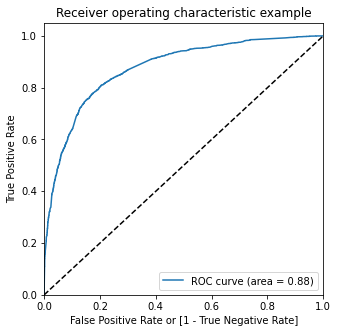

In [251]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [252]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID_Idx,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.820131,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.095030,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.317636,1962,0,1,1,1,1,0,0,0,0,0,0
3,1,0.953198,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.225912,9170,0,1,1,1,0,0,0,0,0,0,0


In [253]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.582863  0.967755  0.347331
0.2   0.2  0.718613  0.914841  0.598533
0.3   0.3  0.790019  0.827615  0.767012
0.4   0.4  0.810734  0.758165  0.842904
0.5   0.5  0.811205  0.694088  0.882874
0.6   0.6  0.792373  0.575444  0.925120
0.7   0.7  0.778249  0.498553  0.949406
0.8   0.8  0.754080  0.403059  0.968884
0.9   0.9  0.707941  0.248863  0.988869


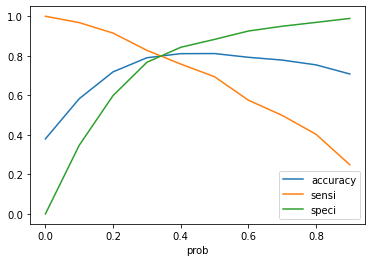

In [254]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Insight
- From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [255]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID_Idx,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.820131,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.095030,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.317636,1962,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.953198,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.225912,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [256]:
# Let's check the overall accuracy.
print_accuracy_score(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy Score %= 80.73


In [257]:
#Check metrics
c_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
calculate_metrics(c_matrix)

Sensitivity %= 77.8
Specificity %= 82.52
False Positive Rate %= 17.48
Positive Predictive Rate %= 73.14
Negative Predictive Rate %= 85.86


### Precision and Recall

In [258]:
# Precision and Recall
def calculate_precision_recall(c_matrix):
    TP = c_matrix[1,1] # true positive 
    TN = c_matrix[0,0] # true negatives
    FP = c_matrix[0,1] # false positives
    FN = c_matrix[1,0] # false negatives
    
    print("Precision %=",round((TP/(FP+TP))*100,2))
    
    print("Recall %=",round((TP/(FN+TP))*100,2))
    

In [259]:
# Calculate Precision and Recall
c_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
calculate_precision_recall(c_matrix)

#Using sklearn utilities for the same
precision2 = precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("Precision (Using sklearn util) =",round(precision2*100,2))
    
recall2 = recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("Recall (Using sklearn util) =",round(recall2*100,2))
    

Precision %= 73.14
Recall %= 77.8
Precision (Using sklearn util) = 73.14
Recall (Using sklearn util) = 77.8


### Precision and recall tradeoff

In [260]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

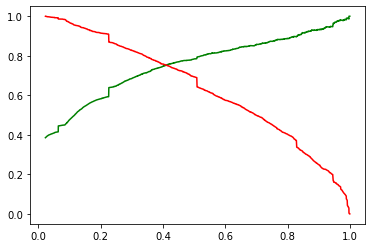

In [261]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 10: Making predictions on the test set

In [262]:
#Transform features 
X_test[['TotalVisits','TimeSpentOnWebsite','PageViewsPerVisit']] = scaler.transform(X_test[['TotalVisits','TimeSpentOnWebsite','PageViewsPerVisit']])

X_test = X_test[col]
X_test.head()

,DoNotEmail,TimeSpentOnWebsite,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Converted to Lead,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,LastActivity_Unsubscribed,Occupation_Unemployed,Occupation_Working Professional
3504,0,-0.103815,0,0,0,0,0,0,0,0,0,1,0
4050,0,-0.881052,1,0,0,0,0,0,0,1,0,1,0
7201,1,0.424120,0,0,0,0,0,0,0,1,0,1,0
1196,0,-0.105648,0,0,0,0,0,0,0,0,0,1,0
8219,0,-0.428274,0,0,0,0,0,0,0,0,0,1,0


#### Making predictions on the test set

In [263]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting ProspectID to index
y_test_df['ProspectID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ProspectID','Converted','Converted_Prob'], axis=1)

#final_prediction
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Print final predicted model
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,final_predicted
0,3504,0,0.180923,0
1,4050,1,0.944763,1
2,7201,0,0.212296,0
3,1196,0,0.180620,0
4,8219,1,0.133346,0


In [264]:
#Calculate the lead score
y_pred_final['Lead Score'] = y_pred_final.Converted_Prob.apply(lambda x: x*100)

#sort based on 'lead score' in descending order
y_pred_final.sort_values(by=['Lead Score'],ascending=False,inplace=True)

# Print final predicted model
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,final_predicted,Lead Score
1424,4613,1,0.998848,1,99.884780
2066,8293,1,0.996805,1,99.680471
2108,4062,1,0.996652,1,99.665154
1509,2672,1,0.996646,1,99.664606
2315,2643,1,0.996646,1,99.664606


In [265]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
calculate_metrics(confusion2)

Sensitivity %= 76.1
Specificity %= 83.96
False Positive Rate %= 16.04
Positive Predictive Rate %= 74.53
Negative Predictive Rate %= 85.06


In [266]:
# Let's check the overall accuracy.
print_accuracy_score(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy Score %= 80.96


### Step 11: Conclusion

### Final LR Model Stats (Train set) is,

- Accuracy Score %= 80.84
- Sensitivity %= 77.18
- Specificity %= 83.08
- False Positive Rate %= 16.92
- Positive Predictive Rate %= 73.62
- Negative Predictive Rate %= 85.61
- Precision %= 73.62
- Recall %= 77.18

### Predicted LR Model Stats (Test Set) is,

- Accuracy Score %= 80.96
- Sensitivity %= 76.1
- Specificity %= 83.96
- False Positive Rate %= 16.04
- Positive Predictive Rate %= 74.53
- Negative Predictive Rate %= 85.06

In [267]:
# Get the top features list based on coefficient
body = pd.read_html(res.summary().as_html())[1]
body = body[[0,1]]
body.columns = ['Features','Coeff']
body =body.iloc[2:]
body.sort_values(by=['Coeff'],ascending=False)

,Features,Coeff
4,LeadOrigin_Lead Add Form,3.9492
14,Occupation_Working Professional,2.1848
7,LeadSource_Welingak Website,1.9026
9,LastActivity_Had a Phone Conversation,1.8363
11,LastActivity_SMS Sent,1.2664
5,LeadOrigin_Lead Import,1.2390
12,LastActivity_Unsubscribed,1.2094
6,LeadSource_Olark Chat,1.1447
3,TimeSpentOnWebsite,1.1144
2,DoNotEmail,-1.6558


### Top 3 variables 
	1. Lead Origin
	2. Occupation
	3. Lead Source

### Top 3 categorical/dummy variables 
	1. Lead Origin_Lead Add Form
	2. Occupation_Working Professional
	3. Lead Source_Welingak Website

### Step 12: Recommendations

### Strategy 1: 
<p>Consider lead score <b> >= 75 </b> as high score (Hot Score)</p>
<p>Target only those customers whose lead score is high <b> (>= 75) </b> and <b> model predicted value is 1</b>. </p>
<p>As we have a greater number of interns, let use divide these interns into 3 groups</p>
<p><b>Group 1:</b> Contact customers whose lead score is <b> >=95</b> </p>
<p><b>Group 2:</b> Contact customers whose lead score is <b> >=85 and < 95 </b></p>
<p><b>Group 3:</b> Contact customers whose lead score is <b> >=75 and < 85 </b></p>
<p>This strategy will help more aggressively achieve high conversion rate.</p>


### Strategy  2: 
<p>Consider lead score <b>>= 90 </b> as high score (Hot Score)</p>
<p>Target only those customers whose lead score is <b>high (>= 90)</b> and <b>model predicted value is 1</b>. </p>
<p>This strategy will help more aggressively achieve high conversion rate.</p>